In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
from numba import jit
from numba.typed import List
a = sys.path.append('../modules/')
b = sys.path.append('../codes/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_mag_arraial_2.csv', sep=',')

In [3]:
east_min = np.min(data_cubo['East(m)'])
east_max = np.max(data_cubo['East(m)'])
north_min = np.min(data_cubo['North(m)'])
north_max = np.max(data_cubo['North(m)'])

{'nx': 20, 'ny': 20, 'xmax': 810803.3383135288, 'xmin': 803484.484403922, 'ymax': 7462279.995826231, 'ymin': 7455485.14487149, 'z': -50.0, 'color': '.r'}


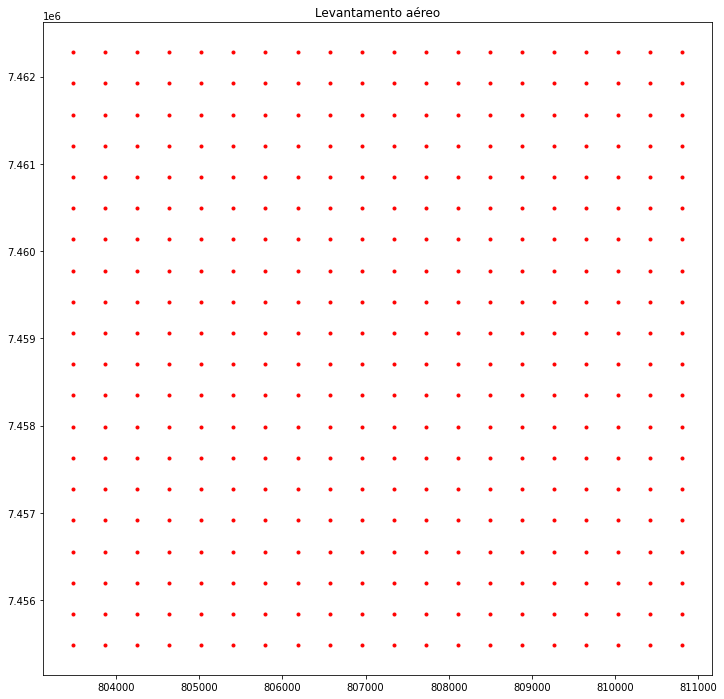

In [4]:
acquisition = {'nx': 20,
               'ny': 20,
               'xmax': east_max,
               'xmin': east_min ,
               'ymax': north_max,
               'ymin': north_min,
               'z': -50.0,
               'color': '.r'}

print(acquisition)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

In [5]:
data_cubo

,North(m),East(m),Anomalia Magnética(nT)
0,7.455632e+06,803484.484404,-102.266401
1,7.455982e+06,803491.547619,-105.513231
2,7.456332e+06,803498.609914,-82.026684
3,7.456682e+06,803505.671289,-47.890550
4,7.457031e+06,803512.731744,-31.751643
...,...,...,...
395,7.460734e+06,810774.476946,-144.769695
396,7.461084e+06,810781.693701,-117.964062
397,7.461434e+06,810788.909514,-137.045579
398,7.461784e+06,810796.124385,-122.671857


In [6]:
Y = np.array(data_cubo['East(m)'])
Y = np.reshape(Y, (20,20))
X = np.array(data_cubo['North(m)'])
X = np.reshape(X, (20,20))
Z = np.array(data_cubo['Anomalia Magnética(nT)'])
Z = np.reshape(Z, (20,20))

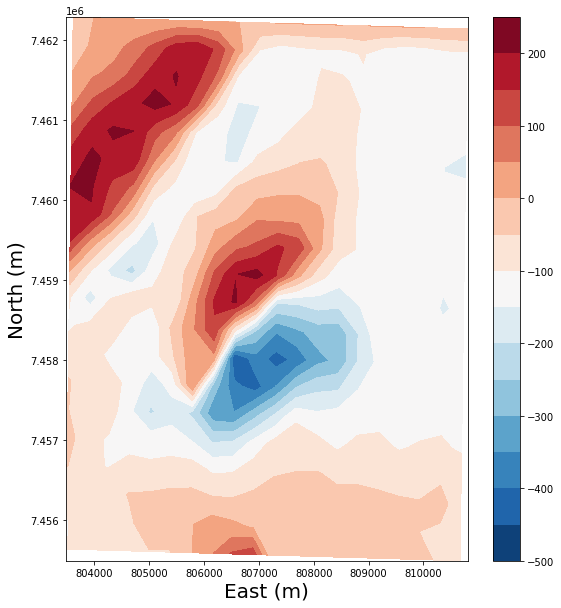

In [7]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y, X, Z, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [ ]:
mean_anomaly = np.mean(data_cubo['Anomalia Magnética(nT)'])
print(mean_anomaly)

In [ ]:
# Ajuste 1
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 805500.0) & (data_cubo['North(m)'] >= 7460000.0) & (data_cubo['North(m)'] <= 7462335.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 2
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 805600.0) & (data_cubo['North(m)'] >= 7462500.0) & (data_cubo['North(m)'] <= 7462000.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 2
#data_cubo.loc[(data_cubo['East(m)'] >= 804500.00) & (data_cubo['East(m)'] <= 806000.0) & (data_cubo['North(m)'] >= 7461000.0) & (data_cubo['North(m)'] <= 7460900.0), 'Anomalia Magnética(nT)'] = mean_anomaly

In [ ]:
# Ajuste 3
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 805450.0) & (data_cubo['North(m)'] >= 7457000.0) & (data_cubo['North(m)'] <= 7461500.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 4
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 810813.0) & (data_cubo['North(m)'] >= 7460400.0) & (data_cubo['North(m)'] <= 7462900.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 4
data_cubo.loc[(data_cubo['East(m)'] >= 803000.49) & (data_cubo['East(m)'] <= 810813.0) & (data_cubo['North(m)'] >= 7454552.0) & (data_cubo['North(m)'] <= 7456900.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 5
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 808000.0) & (data_cubo['North(m)'] >= 7460700.0) & (data_cubo['North(m)'] <= 7462000.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 6
data_cubo.loc[(data_cubo['East(m)'] >= 809000.0) & (data_cubo['East(m)'] <= 810813.0) & (data_cubo['North(m)'] >= 7455486.0) & (data_cubo['North(m)'] <= 7463552.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 6
data_cubo.loc[(data_cubo['East(m)'] >= 805000.0) & (data_cubo['East(m)'] <= 806100.0) & (data_cubo['North(m)'] >= 7459050.0) & (data_cubo['North(m)'] <= 7461500.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
# Ajuste 6
data_cubo.loc[(data_cubo['East(m)'] >= 805300.0) & (data_cubo['East(m)'] <= 806600.0) & (data_cubo['North(m)'] >= 7459750.0) & (data_cubo['North(m)'] <= 7460200.0), 'Anomalia Magnética(nT)'] = 0.0

In [ ]:
data_cubo

In [ ]:
Y_1 = np.array(data_cubo['East(m)'])
Y_1 = np.reshape(Y_1, (20,20))
X_1 = np.array(data_cubo['North(m)'])
X_1 = np.reshape(X_1, (20,20))
Z_1 = np.array(data_cubo['Anomalia Magnética(nT)'])
Z_1 = np.reshape(Z_1, (20,20))

In [ ]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y_1, X_1, Z_1, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [ ]:
# Importing *regular grid* and *profile* from grids
c = sys.path.append('/home/romulo/my_project_dir/Inversao_magnetica/codes/romulo/')
from grids import my_regular, my_profile
# Import *griddata* function from Scipy library
from scipy.interpolate import griddata

In [ ]:
# Setting area for Morro do Forno (northern anomaly)
area = (804500, 809500, 7456000, 7461000)
# Shape of new data and grid creation
shp = (20,20)
mag = np.array(data_cubo['Anomalia Magnética(nT)'])
xi, yi, zi = my_regular(area, shp, -10.) # The *-200* value represent the flight level

In [ ]:
Y_real = np.array(data_cubo['East(m)'])
X_real = np.array(data_cubo['North(m)'])

In [ ]:
di = griddata((Y_real,X_real), mag, (xi,yi), method = 'linear', fill_value=0.)

In [ ]:
Y_2 = np.reshape(xi, (20,20))
X_2 = np.reshape(yi, (20,20))
Z_2 = np.reshape(di, (20,20))

In [ ]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y_2, X_2, Z_2, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [ ]:
shape = di.shape
north_1 = np.reshape(yi, (shape[0], 1))
east_1 = np.reshape(xi, (shape[0], 1))
di_1 = np.reshape(di, (shape[0], 1))
cabecalho = ['North(m)']
Data_f = pd.DataFrame(data = north_1, index = None, columns=cabecalho)
Data_f['East(m)'] = east_1
Data_f['Anomalia Magnética(nT)'] = di_1

In [ ]:
#Data_f = data_cubo
#Data_f.to_csv('data_ajustment_mag_arraial_02_12_2021_background_0.csv', index = False, header = True)

In [ ]:
Data_f